In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# importiamo il primo file csv
artisti = pd.read_csv('Artists.csv', sep=',')

In [4]:
artisti.head()

,Name,ID,Gender,Age,Country,Genres,Popularity,Followers,URI
0,Drake,3TVXtAsR1Inumwj472S9r4,male,33,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,spotify:artist:3TVXtAsR1Inumwj472S9r4
1,Post Malone,246dkjvS1zLTtiykXe5h60,male,25,US,"['dfw rap', 'melodic rap', 'pop', 'rap']",86,43130108,spotify:artist:246dkjvS1zLTtiykXe5h60
2,Ed Sheeran,6eUKZXaKkcviH0Ku9w2n3V,male,29,GB,"['pop', 'singer-songwriter pop', 'uk pop']",87,115998928,spotify:artist:6eUKZXaKkcviH0Ku9w2n3V
3,J Balvin,1vyhD5VmyZ7KMfW5gqLgo5,male,35,CO,"['reggaeton', 'reggaeton colombiano', 'trap la...",83,38028010,spotify:artist:1vyhD5VmyZ7KMfW5gqLgo5
4,Bad Bunny,4q3ewBCX7sLwd24euuV69X,male,26,PR,"['reggaeton', 'trap latino', 'urbano latino']",95,77931484,spotify:artist:4q3ewBCX7sLwd24euuV69X


In [4]:
artisti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9488 entries, 0 to 9487
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9488 non-null   object
 1   ID          9488 non-null   object
 2   Gender      7829 non-null   object
 3   Age         9488 non-null   int64 
 4   Country     6305 non-null   object
 5   Genres      9488 non-null   object
 6   Popularity  9488 non-null   int64 
 7   Followers   9488 non-null   int64 
 8   URI         9488 non-null   object
dtypes: int64(3), object(6)
memory usage: 667.3+ KB


Notiamo che il seguente file presenta dei dati duplicati, perciò li eliminiamo per poter analizzare i dati in modo più preciso

In [3]:
# importiamo il secondo file csv
top_songs = pd.read_csv('Top_Songs_US.csv', sep=',')

In [4]:
top_songs_unique = top_songs.drop_duplicates(subset=['Artist ID', 'Track Id']) # eliminiamo i valori duplicati

In [5]:
top_songs.head(20)

,Album Type,Artist ID,Artist Name,Artist Song Rank,Track Name,Is Playable,Album Name,Release Date,Total Album Tracks,Is Explicit,ISRC,Song Duration,Track Number,Popularity,Track Id,Track URI
0,album,3TVXtAsR1Inumwj472S9r4,Drake,1,IDGAF (feat. Yeat),True,For All The Dogs,2023-10-06,23,True,USUG12306072,260111,7,93,2YSzYUF3jWqb9YP9VXmpjE,spotify:track:2YSzYUF3jWqb9YP9VXmpjE
1,album,3TVXtAsR1Inumwj472S9r4,Drake,2,First Person Shooter (feat. J. Cole),True,For All The Dogs,2023-10-06,23,True,USUG12306071,247444,6,91,7aqfrAY2p9BUSiupwk3svU,spotify:track:7aqfrAY2p9BUSiupwk3svU
2,album,3TVXtAsR1Inumwj472S9r4,Drake,3,Rich Baby Daddy (feat. Sexyy Red & SZA),True,For All The Dogs,2023-10-06,23,True,USUG12306085,319191,20,89,1yeB8MUNeLo9Ek1UEpsyz6,spotify:track:1yeB8MUNeLo9Ek1UEpsyz6
3,album,3TVXtAsR1Inumwj472S9r4,Drake,4,Jimmy Cooks (feat. 21 Savage),True,"Honestly, Nevermind",2022-06-17,14,True,USUG12204897,218364,14,89,3F5CgOj3wFlRv51JsHbxhe,spotify:track:3F5CgOj3wFlRv51JsHbxhe
4,album,3TVXtAsR1Inumwj472S9r4,Drake,5,One Dance,True,Views,2016-05-06,20,False,USCM51600028,173986,12,89,1zi7xx7UVEFkmKfv06H8x0,spotify:track:1zi7xx7UVEFkmKfv06H8x0
5,album,3TVXtAsR1Inumwj472S9r4,Drake,6,MELTDOWN (feat. Drake),True,UTOPIA,2023-07-28,19,True,USSM12305021,246133,7,88,67nepsnrcZkowTxMWigSbb,spotify:track:67nepsnrcZkowTxMWigSbb
6,album,3TVXtAsR1Inumwj472S9r4,Drake,7,Virginia Beach,True,For All The Dogs,2023-10-06,23,True,USUG12306066,251094,1,85,3eP13S8D5m2cweMEg3ZDed,spotify:track:3eP13S8D5m2cweMEg3ZDed
7,album,3TVXtAsR1Inumwj472S9r4,Drake,8,Rich Flex,True,Her Loss,2022-11-04,16,True,USUG12208598,239359,1,87,1bDbXMyjaUIooNwFE9wn0N,spotify:track:1bDbXMyjaUIooNwFE9wn0N
8,album,3TVXtAsR1Inumwj472S9r4,Drake,9,Slime You Out (feat. SZA),True,For All The Dogs,2023-10-06,23,True,USUG12306064,310490,9,80,0AYt6NMyyLd0rLuvr0UkMH,spotify:track:0AYt6NMyyLd0rLuvr0UkMH
9,album,3TVXtAsR1Inumwj472S9r4,Drake,10,God's Plan,True,Scorpion,2018-06-29,25,True,USCM51800004,198973,5,86,6DCZcSspjsKoFjzjrWoCdn,spotify:track:6DCZcSspjsKoFjzjrWoCdn


In [6]:
top_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37146 entries, 0 to 37145
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Album Type          37146 non-null  object
 1   Artist ID           37146 non-null  object
 2   Artist Name         37146 non-null  object
 3   Artist Song Rank    37146 non-null  int64 
 4   Track Name          37146 non-null  object
 5   Is Playable         37146 non-null  bool  
 6   Album Name          37146 non-null  object
 7   Release Date        37146 non-null  object
 8   Total Album Tracks  37146 non-null  int64 
 9   Is Explicit         37146 non-null  bool  
 10  ISRC                37146 non-null  object
 11  Song Duration       37146 non-null  int64 
 12  Track Number        37146 non-null  int64 
 13  Popularity          37146 non-null  int64 
 14  Track Id            37146 non-null  object
 15  Track URI           37146 non-null  object
dtypes: bool(2), int64(5), 

In [7]:
# convertiamo la colonna 'Release Date' in datetime
top_songs_unique['Release Date'] = pd.to_datetime(top_songs_unique['Release Date'], utc=True).dt.tz_convert('Europe/Berlin')

C:\Users\User\AppData\Local\Temp\ipykernel_11040\2370168899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_songs_unique['Release Date'] = pd.to_datetime(top_songs_unique['Release Date'], utc=True).dt.tz_convert('Europe/Berlin')


In [71]:
top_songs_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4034 entries, 0 to 4033
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype                        
---  ------              --------------  -----                        
 0   Album Type          4034 non-null   object                       
 1   Artist ID           4034 non-null   object                       
 2   Artist Name         4034 non-null   object                       
 3   Artist Song Rank    4034 non-null   int64                        
 4   Track Name          4034 non-null   object                       
 5   Is Playable         4034 non-null   bool                         
 6   Album Name          4034 non-null   object                       
 7   Release Date        4034 non-null   datetime64[ns, Europe/Berlin]
 8   Total Album Tracks  4034 non-null   int64                        
 9   Is Explicit         4034 non-null   bool                         
 10  ISRC                4034 non-null   

In [72]:
top_songs_unique.head(5) # osserviamo come è cambiata la colonna 'Release Date'

,Album Type,Artist ID,Artist Name,Artist Song Rank,Track Name,Is Playable,Album Name,Release Date,Total Album Tracks,Is Explicit,ISRC,Song Duration,Track Number,Popularity,Track Id,Track URI,Release Month,Release Year
0,album,3TVXtAsR1Inumwj472S9r4,Drake,1,IDGAF (feat. Yeat),True,For All The Dogs,2023-10-06 02:00:00+02:00,23,True,USUG12306072,260111,7,93,2YSzYUF3jWqb9YP9VXmpjE,spotify:track:2YSzYUF3jWqb9YP9VXmpjE,October,2023
1,album,3TVXtAsR1Inumwj472S9r4,Drake,2,First Person Shooter (feat. J. Cole),True,For All The Dogs,2023-10-06 02:00:00+02:00,23,True,USUG12306071,247444,6,91,7aqfrAY2p9BUSiupwk3svU,spotify:track:7aqfrAY2p9BUSiupwk3svU,October,2023
2,album,3TVXtAsR1Inumwj472S9r4,Drake,3,Rich Baby Daddy (feat. Sexyy Red & SZA),True,For All The Dogs,2023-10-06 02:00:00+02:00,23,True,USUG12306085,319191,20,89,1yeB8MUNeLo9Ek1UEpsyz6,spotify:track:1yeB8MUNeLo9Ek1UEpsyz6,October,2023
3,album,3TVXtAsR1Inumwj472S9r4,Drake,4,Jimmy Cooks (feat. 21 Savage),True,"Honestly, Nevermind",2022-06-17 02:00:00+02:00,14,True,USUG12204897,218364,14,89,3F5CgOj3wFlRv51JsHbxhe,spotify:track:3F5CgOj3wFlRv51JsHbxhe,June,2022
4,album,3TVXtAsR1Inumwj472S9r4,Drake,5,One Dance,True,Views,2016-05-06 02:00:00+02:00,20,False,USCM51600028,173986,12,89,1zi7xx7UVEFkmKfv06H8x0,spotify:track:1zi7xx7UVEFkmKfv06H8x0,May,2016


Partiamo da una semplice ricerca per introdurre il genere più ascoltato nel nostro dataset

In [8]:
# Facciamo il merge dei due file tramite l'ID dell'artista
merged_df = pd.merge(artisti, top_songs_unique, left_on='ID', right_on='Artist ID')

In [9]:
merged_df_unique = merged_df.drop_duplicates(subset=['Artist ID', 'Track Id'])
merged_df_unique

,Name,ID,Gender,Age,Country,Genres,Popularity_x,Followers,URI,Album Type,...,Album Name,Release Date,Total Album Tracks,Is Explicit,ISRC,Song Duration,Track Number,Popularity_y,Track Id,Track URI
0,Drake,3TVXtAsR1Inumwj472S9r4,male,33,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,spotify:artist:3TVXtAsR1Inumwj472S9r4,album,...,For All The Dogs,2023-10-06 02:00:00+02:00,23,True,USUG12306072,260111,7,93,2YSzYUF3jWqb9YP9VXmpjE,spotify:track:2YSzYUF3jWqb9YP9VXmpjE
1,Drake,3TVXtAsR1Inumwj472S9r4,male,33,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,spotify:artist:3TVXtAsR1Inumwj472S9r4,album,...,For All The Dogs,2023-10-06 02:00:00+02:00,23,True,USUG12306071,247444,6,91,7aqfrAY2p9BUSiupwk3svU,spotify:track:7aqfrAY2p9BUSiupwk3svU
2,Drake,3TVXtAsR1Inumwj472S9r4,male,33,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,spotify:artist:3TVXtAsR1Inumwj472S9r4,album,...,For All The Dogs,2023-10-06 02:00:00+02:00,23,True,USUG12306085,319191,20,89,1yeB8MUNeLo9Ek1UEpsyz6,spotify:track:1yeB8MUNeLo9Ek1UEpsyz6
3,Drake,3TVXtAsR1Inumwj472S9r4,male,33,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,spotify:artist:3TVXtAsR1Inumwj472S9r4,album,...,"Honestly, Nevermind",2022-06-17 02:00:00+02:00,14,True,USUG12204897,218364,14,89,3F5CgOj3wFlRv51JsHbxhe,spotify:track:3F5CgOj3wFlRv51JsHbxhe
4,Drake,3TVXtAsR1Inumwj472S9r4,male,33,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,spotify:artist:3TVXtAsR1Inumwj472S9r4,album,...,Views,2016-05-06 02:00:00+02:00,20,False,USCM51600028,173986,12,89,1zi7xx7UVEFkmKfv06H8x0,spotify:track:1zi7xx7UVEFkmKfv06H8x0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4029,WATTS,4B3aifxHtpcKHuNi12lmSt,NaN,9,NaN,[],39,7812,spotify:artist:4B3aifxHtpcKHuNi12lmSt,single,...,Never Leave You,2019-12-20 01:00:00+01:00,1,False,TCAEO1938724,199371,1,26,6JCz7BU1dH8tX8Fyp367Zn,spotify:track:6JCz7BU1dH8tX8Fyp367Zn
4030,WATTS,4B3aifxHtpcKHuNi12lmSt,NaN,9,NaN,[],39,7812,spotify:artist:4B3aifxHtpcKHuNi12lmSt,single,...,Lie Here With You,2020-02-28 01:00:00+01:00,1,False,TCAER2032244,162706,1,24,0LHYw6rKvyu1ETvwQC2LNp,spotify:track:0LHYw6rKvyu1ETvwQC2LNp
4031,WATTS,4B3aifxHtpcKHuNi12lmSt,NaN,9,NaN,[],39,7812,spotify:artist:4B3aifxHtpcKHuNi12lmSt,single,...,After You’re Gone / Enough,2023-09-28 02:00:00+02:00,2,False,TCAHJ2398553,191190,1,23,3USUELVZXDw5S9YHgEcJ91,spotify:track:3USUELVZXDw5S9YHgEcJ91
4032,WATTS,4B3aifxHtpcKHuNi12lmSt,NaN,9,NaN,[],39,7812,spotify:artist:4B3aifxHtpcKHuNi12lmSt,single,...,Get Up,2020-08-28 02:00:00+02:00,1,False,TCAEZ2083945,197891,1,14,6LhQ6BC6n45XcC1BAtnJ5M,spotify:track:6LhQ6BC6n45XcC1BAtnJ5M


In [10]:
# Per comodità, creiamo un file csv contenente il merge dei due file senza i valori duplicati
merged_df_unique.to_csv('Merged_dataset.csv', index=False)

In [74]:
# popolarità dell'artista

artist_popularity = merged_df_unique.groupby('Genres')['Popularity_x'].sum() # raggruppiamo per genere e sommiamo la popolarità per ciascun genere

In [75]:
# popolarità delle canzoni

song_popularity = merged_df_unique.groupby('Genres')['Popularity_y'].sum() # raggruppiamo per genere e sommiamo la popolarità per ciascun genere

In [76]:
# visualizziamo il genere dell'artista più ascoltato/popolare
most_listened_artist_genre = artist_popularity.idxmax()
most_listened_artist_genre

"['pop']"

In [77]:
# visualizziamo il genere delle canzoni più ascoltate/popolari
most_listened_song_genre = song_popularity.idxmax()
most_listened_song_genre

"['pop']"

Osserviamo dunque che il genere più ascoltato è il pop. Ma è sempre stato così? Lo analizzeremo più avanti

Analizziamo ora l'artista più famoso

In [78]:
popolarità_artista = merged_df_unique.groupby(['ID', 'Name', 'Gender', 'Genres'])['Popularity_x'].sum()

most_popular_artist = popolarità_artista.idxmax()
most_popular_artist

('06HL4z0CvFAxyc27GXpf02', 'Taylor Swift', 'female', "['pop']")

In [79]:
# ora osserviamo la top 5 artisti più famosi
top_5_artists = popolarità_artista.nlargest(5)
top_5_artists

ID                      Name          Gender  Genres                                                           
06HL4z0CvFAxyc27GXpf02  Taylor Swift  female  ['pop']                                                              1000
3TVXtAsR1Inumwj472S9r4  Drake         male    ['canadian hip hop', 'canadian pop', 'hip hop', 'pop rap', 'rap']     950
4q3ewBCX7sLwd24euuV69X  Bad Bunny     male    ['reggaeton', 'trap latino', 'urbano latino']                         950
1Xyo4u8uXC1ZmMpatF05PJ  The Weeknd    male    ['canadian contemporary r&b', 'canadian pop', 'pop']                  930
0Y5tJX1MQlPlqiwlOH1tJY  Travis Scott  male    ['hip hop', 'rap', 'slap house']                                      900
Name: Popularity_x, dtype: int64

In [80]:
top_10_with_genre = popolarità_artista.nlargest(10)
top_10_with_genre

ID                      Name          Gender  Genres                                                                                                 
06HL4z0CvFAxyc27GXpf02  Taylor Swift  female  ['pop']                                                                                                    1000
3TVXtAsR1Inumwj472S9r4  Drake         male    ['canadian hip hop', 'canadian pop', 'hip hop', 'pop rap', 'rap']                                           950
4q3ewBCX7sLwd24euuV69X  Bad Bunny     male    ['reggaeton', 'trap latino', 'urbano latino']                                                               950
1Xyo4u8uXC1ZmMpatF05PJ  The Weeknd    male    ['canadian contemporary r&b', 'canadian pop', 'pop']                                                        930
0Y5tJX1MQlPlqiwlOH1tJY  Travis Scott  male    ['hip hop', 'rap', 'slap house']                                                                            900
5K4W6rqBFWDnAN6FQUkS6x  Kanye West    male    ['chicago rap'

Da questa analisi vediamo che, oltre al pop, i generi più ascoltati sono 'hip hop' e 'rap', insieme ai loro sotto generi (e.g 'atl hip hop')

Inoltre, osserviamo che l'artista con più popolarità è Taylor Swift, il cui genere musicale è il pop. Oltre a lei, altri artisti famosi hanno lo stesso genere musicale, altri ne aggiungono degli altri oltre al pop. In generale, vediamo questi artisti e questi generi musicali come i più popolari.

È sempre stato così? Se dovessimo analizzare un arco temporale diverso, troveremo lo stesso risultato? Oppure potremmo trovare un tempo in cui questi generi musicali (o gli artisti stessi) non erano poi così famosi? 

-----------------------------------------------------------------------------------------------------------------------------

Cominciamo con il cercare un determinato periodo di tempo in cui sono state pubblicate il maggior numero di canzoni, per poter vedere nel corso del tempo come si sono evoluti i rilasci delle canzoni.

Osserviamo le canzoni rilasciate in ciascun anno per ottenere un totale.

In [11]:
top_songs_unique['Release Year'] = top_songs_unique['Release Date'].dt.year #estraiamo l'anno dalla data di rilascio delle canzoni

C:\Users\User\AppData\Local\Temp\ipykernel_11040\783290743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_songs_unique['Release Year'] = top_songs_unique['Release Date'].dt.year #estraiamo l'anno dalla data di rilascio delle canzoni


In [12]:
canzoni_per_anno = top_songs_unique.groupby('Release Year').size()
canzoni_per_anno

Release Year
1964      3
1965      2
1966      3
1967      1
1969      1
1974      1
1975      1
1976      1
1977      2
1978      1
1979      1
1980      3
1982      1
1984      2
1987      1
1988      3
1990      1
1991      1
1992      1
1993      2
1994      9
1995      6
1996      1
1997      4
1998      1
1999      7
2000      6
2001     17
2002     15
2003      7
2004      9
2005     20
2006     11
2007     23
2008     26
2009     27
2010     48
2011     51
2012     66
2013    102
2014    111
2015    173
2016    210
2017    324
2018    424
2019    454
2020    346
2021    303
2022    387
2023    814
dtype: int64

Utilizziamo un grafico per poter osservare i dati più chiaramente.

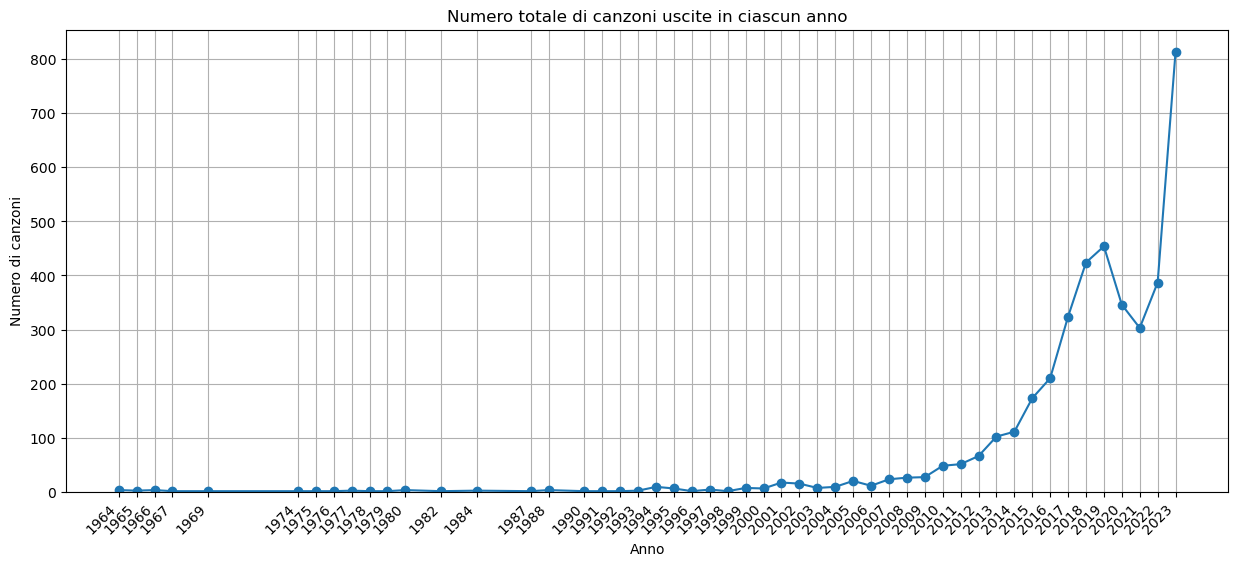

In [13]:
plt.figure(figsize=(15,6))
plt.plot(canzoni_per_anno.index, canzoni_per_anno, marker='o')
plt.title('Numero totale di canzoni uscite in ciascun anno')
plt.xlabel('Anno')
plt.ylabel('Numero di canzoni')

plt.xticks(rotation=45, ha='right') # ha = horizontal alignment
plt.xticks(canzoni_per_anno.index)

plt.gca().set_ylim(bottom=0) # gca = get current axes. Usato per utilizzare metodi custom. Utilizzo di set_ylim per settare un limite all'asse y

plt.grid(True)

plt.show()

Osserviamo che l'anno con il maggior numero di canzoni rilasciate è il 2023.

-------------------------------------------------------------------------------------------------------

Vediamo ora nel dettaglio l'anno 2023 cercando il mese con il numero di canzoni rilasciate più alto

In [64]:
top_songs_unique['Release Month'] = top_songs_unique['Release Date'].dt.month_name() #estraiamo il mese dalla data di rilascio delle canzoni

C:\Users\User\AppData\Local\Temp\ipykernel_10992\3678312688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_songs_unique['Release Month'] = top_songs_unique['Release Date'].dt.month_name() #estraiamo il mese dalla data di rilascio delle canzoni


In [84]:
yearly_release_counts = top_songs_unique.groupby(['Release Year', 'Release Month']).size().reset_index(name='count')
yearly_release_counts

,Release Year,Release Month,count
0,1964,August,3
1,1965,July,1
2,1965,November,1
3,1966,August,1
4,1966,February,2
...,...,...,...
255,2023,March,53
256,2023,May,47
257,2023,November,146
258,2023,October,123


In [85]:
max_count = yearly_release_counts.loc[yearly_release_counts['count'].idxmax()]
max_count

Release Year         2023
Release Month    November
count                 146
Name: 257, dtype: object

Osserviamo essere Novembre. Vediamo i dati in modo più chiaro.

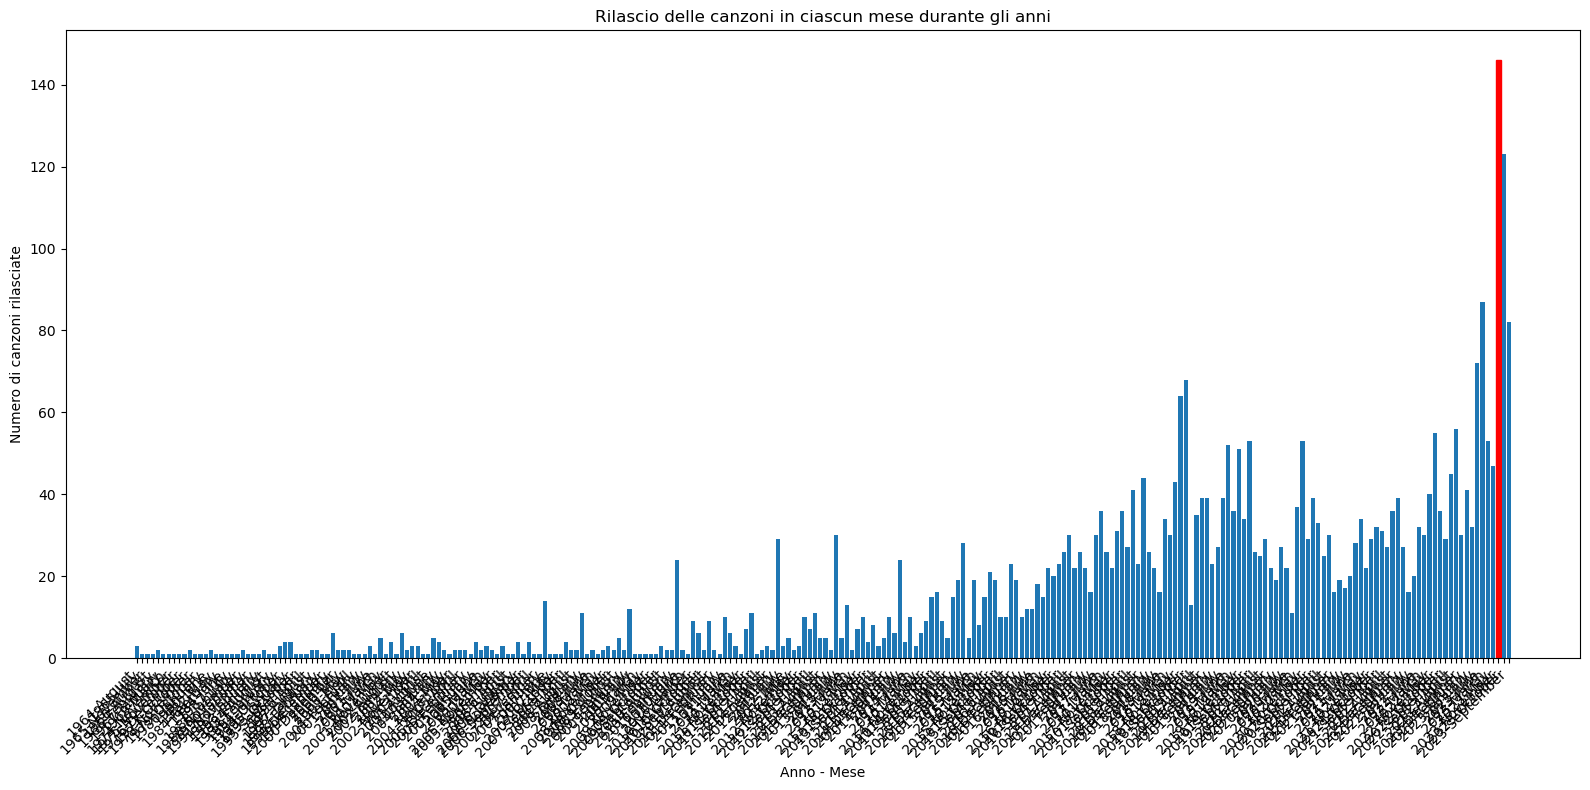

In [86]:
plt.figure(figsize=(16,8))
bars = plt.bar(yearly_release_counts['Release Year'].astype(str) + '-' + yearly_release_counts['Release Month'], yearly_release_counts['count'])

max_year_month_row = yearly_release_counts.loc[yearly_release_counts['count'].idxmax()]

highlight_index = yearly_release_counts[(yearly_release_counts['Release Year'] == max_year_month_row['Release Year']) & (yearly_release_counts['Release Month'] == max_year_month_row['Release Month'])].index

plt.title('Rilascio delle canzoni in ciascun mese durante gli anni')
plt.xlabel('Anno - Mese')
plt.ylabel('Numero di canzoni rilasciate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for index in highlight_index:
    bars[index].set_color('red')

plt.show()

Ora focalizziamoci sull'anno 2023 per poter vedere il grafico più chiaramente

C:\Users\User\AppData\Local\Temp\ipykernel_10992\530430647.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_songs_2023 = top_songs_unique[top_songs['Release Year'] == 2023]


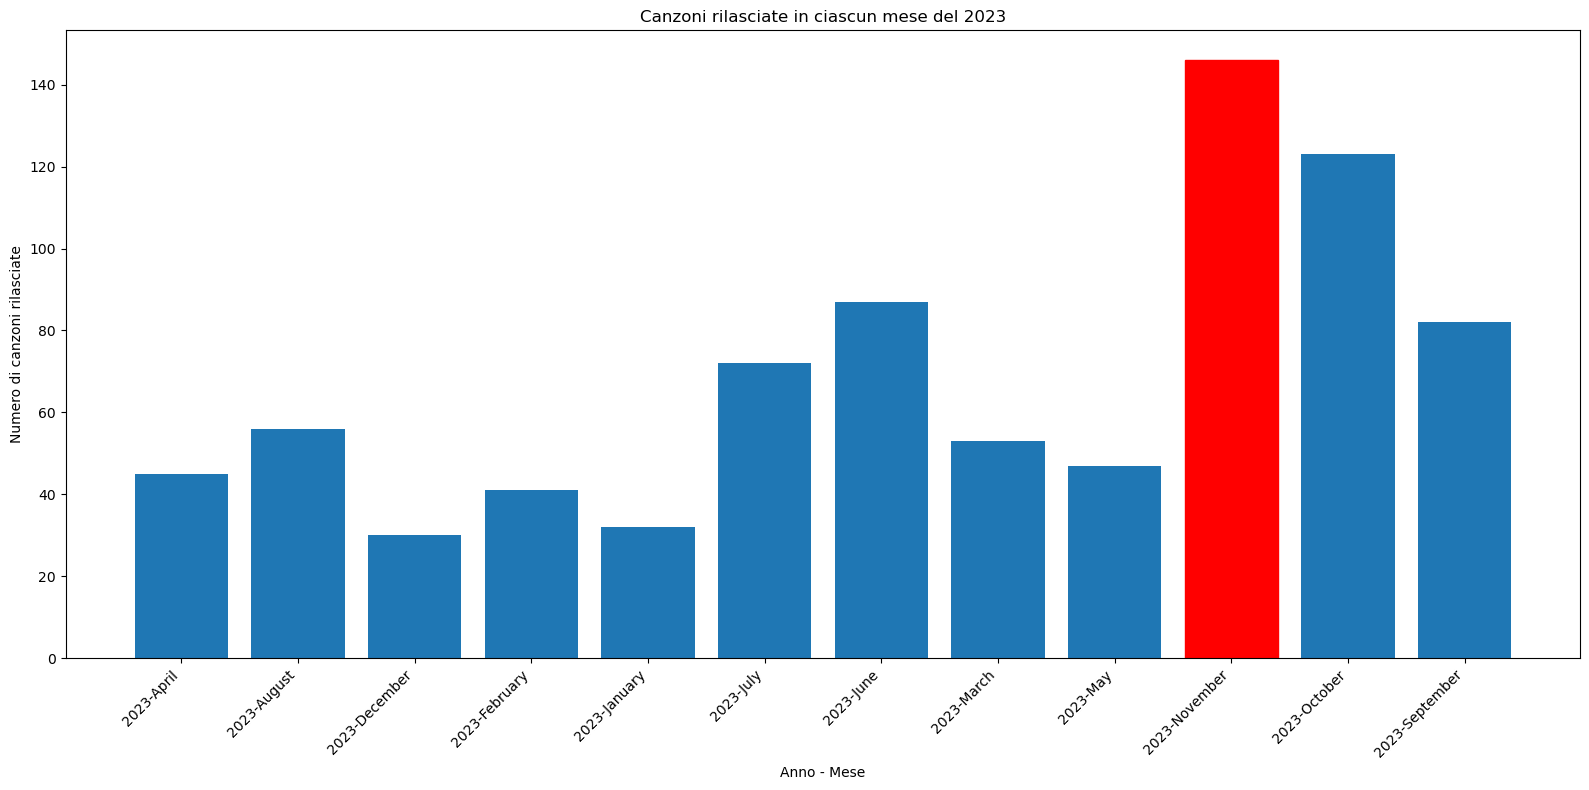

In [87]:
top_songs_2023 = top_songs_unique[top_songs['Release Year'] == 2023]

yearly_release_counts_2023 = top_songs_2023.groupby(['Release Year', 'Release Month']).size().reset_index(name='count')

max_year_month_2023 = yearly_release_counts_2023.loc[yearly_release_counts_2023['count'].idxmax()]

highlight_index_2023 = yearly_release_counts_2023[(yearly_release_counts_2023['Release Month'] == max_year_month_2023['Release Month'])].index

plt.figure(figsize=(16,8))
bars_2023 = plt.bar(yearly_release_counts_2023['Release Year'].astype(str) + '-' + yearly_release_counts_2023['Release Month'], yearly_release_counts_2023['count'])

for index in highlight_index_2023:
    bars_2023[index].set_color('red')

plt.title('Canzoni rilasciate in ciascun mese del 2023')
plt.xlabel('Anno - Mese')
plt.ylabel('Numero di canzoni rilasciate')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [88]:
# Creo una nuova colonna per il decennio
merged_df_unique['Decennio'] = (merged_df_unique['Release Date'].dt.year // 10) * 10

# Raggruppo per decennio e genere. Calcolo poi la popolarità totale per ciascun genere
genere_decennio_popularity = merged_df_unique.groupby(['Decennio', 'Genres'])['Popularity_x'].sum().reset_index()

# Identifico il genere più famoso per decennio
most_famous_genre_per_decade = genere_decennio_popularity.loc[genere_decennio_popularity.groupby('Decennio')['Popularity_x'].idxmax()]

# Raggruppo per decennio e artista. Calcolo poi la popolarità totale per ciascun artista
artista_decennio_popularity = merged_df_unique.groupby(['Decennio', 'Artist ID', 'Name'])['Popularity_y'].sum().reset_index()

# Identifico l'artista più famoso per decennio
most_famous_artist_per_decade = artista_decennio_popularity.loc[artista_decennio_popularity.groupby('Decennio')['Popularity_y'].idxmax()]

print("Genere più famoso per decennio:")
print(most_famous_genre_per_decade[['Decennio', 'Genres', 'Popularity_x']])
print("\nArtista più famoso per decennio:")
print(most_famous_artist_per_decade[['Decennio', 'Artist ID', 'Name', 'Popularity_y']])


Genere più famoso per decennio:
     Decennio                                             Genres  Popularity_x
1        1960  ['classic girl group', 'classic soul', 'disco'...           558
3        1970              ['classic rock', 'glam rock', 'rock']           492
6        1980              ['classic rock', 'glam rock', 'rock']           328
8        1990  ['beatlesque', 'britpop', 'madchester', 'perma...           592
41       2000                               ['dance pop', 'pop']           632
335      2010                                            ['pop']          7374
614      2020                                            ['pop']          6490

Artista più famoso per decennio:
     Decennio               Artist ID          Name  Popularity_y
1        1960  57bUPid8xztkieZfS7OlEV  The Supremes           567
3        1970  1dfeR4HaWDbWqFHLkxsg1d         Queen           431
6        1980  2nszmSgqreHSdJA3zWPyrW   Luis Miguel           314
9        1990  2DaxqgrOhkeH0fpeiQq2f4 

C:\Users\User\AppData\Local\Temp\ipykernel_10992\551043879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_unique['Decennio'] = (merged_df_unique['Release Date'].dt.year // 10) * 10


Utilizziamo dei grafici per capire più chiaramente l'output ottenuto

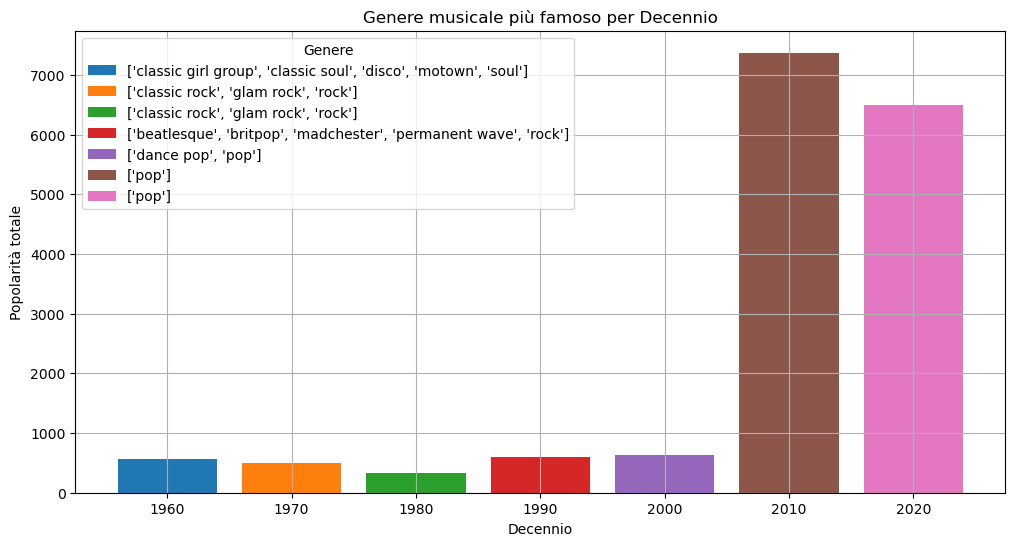

In [89]:
# Plot del genere più famoso per decennio
plt.figure(figsize=(12, 6))
for Decennio, group in most_famous_genre_per_decade.groupby('Decennio'):
    plt.bar(str(Decennio), group['Popularity_x'].iloc[0], label=group['Genres'].iloc[0])

plt.title('Genere musicale più famoso per Decennio')
plt.xlabel('Decennio')
plt.ylabel('Popolarità totale')
plt.legend(title='Genere')
plt.grid(True)
plt.show()

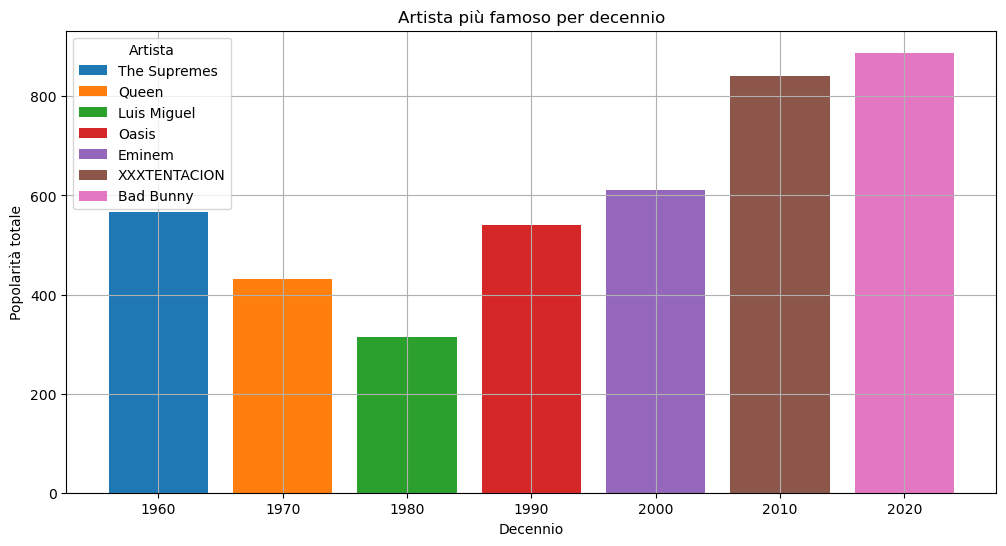

In [91]:
# Plot dell'artista più famoso per decennio
plt.figure(figsize=(12, 6))
for Decennio, group in most_famous_artist_per_decade.groupby('Decennio'):
    plt.bar(str(Decennio), group['Popularity_y'].iloc[0], label=group['Name'].iloc[0])

plt.title('Artista più famoso per decennio')
plt.xlabel('Decennio')
plt.ylabel('Popolarità totale')
plt.legend(title='Artista')
plt.grid(True)
plt.show()


Identifichiamo ora la canzone più popolare per ciascun decennio. Utilizziamo poi un grafico per visualizzare meglio i risultati.

In [22]:
merged_df_unique['Decennio'] = (merged_df_unique['Release Date'].dt.year // 10) * 10
canzone_decennio_popularity = merged_df_unique.groupby(['Decennio', 'Artist Name','Track Name', 'Track Id'])['Popularity_y'].sum().reset_index()

most_popular_song_decennio = canzone_decennio_popularity.loc[canzone_decennio_popularity.groupby('Decennio')['Popularity_y'].idxmax()]

print("Canzone più popolare per decennio:")
print(most_popular_song_decennio[['Decennio','Track Name','Popularity_y', 'Artist Name','Track Id']])


Canzone più popolare per decennio:
      Decennio                           Track Name  Popularity_y  \
8         1960                 You Can't Hurry Love            76   
12        1970  Don't Stop Me Now - Remastered 2011            76   
19        1980              Ahora Te Puedes Marchar            82   
44        1990      All I Want for Christmas Is You            99   
82        2000                               Yellow            92   
1982      2010                         Cruel Summer            99   
2325      2020                          PERRO NEGRO            97   

       Artist Name                Track Id  
8     The Supremes  1OppEieGNdItZbE14gLBEv  
12           Queen  7hQJA50XrCWABAu5v6QZ4i  
19     Luis Miguel  1uKjQoh8JZj9ryuYRhpd7E  
44    Mariah Carey  0bYg9bo50gSsH3LtXe2SQn  
82        Coldplay  3AJwUDP919kvQ9QcozQPxg  
1982  Taylor Swift  1BxfuPKGuaTgP7aM0Bbdwr  
2325     Bad Bunny  7iQXYTyuG13aoeHxGG28Nh  


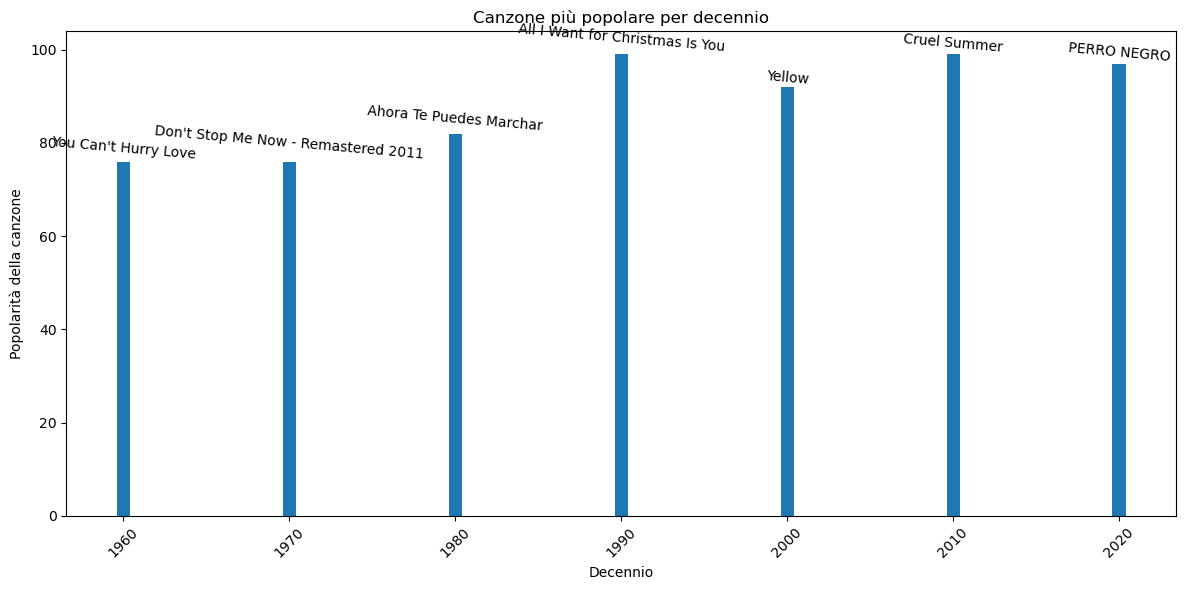

In [30]:
plt.figure(figsize=(12,6))
graph = plt.bar(most_popular_song_decennio['Decennio'], most_popular_song_decennio['Popularity_y'])
plt.title('Canzone più popolare per decennio')
plt.xlabel('Decennio')
plt.ylabel('Popolarità della canzone')
plt.xticks(rotation=45)

for bar, song_title in zip(graph, most_popular_song_decennio['Track Name']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), song_title, ha='center', va='bottom', rotation=-5) # va = vertical alignment

plt.tight_layout()
plt.show()

-----------------------------------------------------------------------------------

Come ultima analisi, concentriamoci su quali fattori possono influenzare maggiormente la popolarità degli artisti. Per popolarità intendiamo sia la popolarità in sè sia il numero di followers. 

Per prima cosa, analizziamo la correlazione tra il paese di origine e la popolarità in sè, dunque utilizzando la colonna 'Popularity'.

In [14]:
correlation_2 = artisti['Country'].astype('category').cat.codes.corr(artisti['Popularity'])
correlation_2

0.20462511399900768

In [15]:
correlation_2 = artisti['Country'].astype('category').cat.codes.corr(artisti['Followers'])
correlation_2

0.11406598755198748

Vediamo che nel secondo caso, il coefficiente di popolarità è più basso se utilizziamo il numero dei followers degli artisti. Invece, nel primo caso, utilizzando la popolarità, notiamo un valore più alto. Possiamo dedurre che nel primo caso, sebbene sia comunque un valore basso, il paese di origine possa essere considerato un fattore che influenza la popolarità di un certo artista, di più rispetto al numero dei followers.

--------------------------------------------------------------------------------------

In [16]:
artisti['num_genres'] = artisti['Genres'].str.split(',').apply(lambda x: len(x))
correlation_3 = artisti['num_genres'].corr(artisti['Followers'])
correlation_3

0.1913351681627288

In [17]:
artisti['num_genres'] = artisti['Genres'].str.split(',').apply(lambda x: len(x))
correlation_3 = artisti['num_genres'].corr(artisti['Popularity'])
correlation_3

0.4368935581631293

In questo caso, osserviamo un valore più alto nella seconda operazione, in cui viene considerata la popolarità invece del numero di followers. Notiamo che certi generi musicali possono essere associati con una popolarità elevata. Ciò vuol dire che, artisti di un certo genere musicale possono avere una popolarità più alta rispetto ad artisti che appartengono ad un genere diverso. Questo specifico fattore è quello con valore più elevato, perciò potrebbe trattarsi di quello che influisce maggiormente sulla popolarità di un artista.